### Note



To be processed data needs to be numeric and stored as Numpy arrays or SciPy matrices. sklearn can read panda matrices, but will return numeric arrays. 

1. What kind of data structure do we have?
    - For tabular: XGboost
    - For non-tabular: NN
2. What kind of information do we have?
    - Labeled data: Supervised
    - Not labeled data: Unsupervised
    - Reinforcement
3. Is our problem linear or non linear
    - Linear: linear algorithms
    - Non-linear: tree algorithms
4. What is the objective
    - Regression
    - Classification


Order
In supervised: 
1. Split to train and test
2. Fit & transform x_train and then transform x_test
3. Train classifier with (x_train, y_train) and predict over (x_test)
4. 


Conclusion of Part 2 - Regression
After learning about these six regression models, you are probably asking yourself the following questions:

What are the pros and cons of each model ?

How do I know which model to choose for my problem ?

How can I improve each of these models ?

Let's answer each of these questions one by one:

1. What are the pros and cons of each model ?

Please find here a cheat-sheet that gives you all the pros and the cons of each regression model.

2. How do I know which model to choose for my problem ?

First, you need to figure out whether your problem is linear or non linear. You will learn how to do that in Part 10 - Model Selection. Then:

If your problem is linear, you should go for Simple Linear Regression if you only have one feature, and Multiple Linear Regression if you have several features.

If your problem is non linear, you should go for Polynomial Regression, SVR, Decision Tree or Random Forest. Then which one should you choose among these four ? That you will learn in Part 10 - Model Selection. The method consists of using a very relevant technique that evaluates your models performance, called k-Fold Cross Validation, and then picking the model that shows the best results. Feel free to jump directly to Part 10 if you already want to learn how to do that.

3. How can I improve each of these models ?

In Part 10 - Model Selection, you will find the second section dedicated to Parameter Tuning, that will allow you to improve the performance of your models, by tuning them. You probably already noticed that each model is composed of two types of parameters:

the parameters that are learnt, for example the coefficients in Linear Regression,

the hyperparameters.

The hyperparameters are the parameters that are not learnt and that are fixed values inside the model equations. For example, the regularization parameter lambda or the penalty parameter C are hyperparameters. So far we used the default value of these hyperparameters, and we haven't searched for their optimal value so that your model reaches even higher performance. Finding their optimal value is exactly what Parameter Tuning is about. So for those of you already interested in improving your model performance and doing some parameter tuning, feel free to jump directly to Part 10 - Model Selection.

And as a BONUS, please find here some slides we made about Regularization.

Now congratulations for having completed Part 2, and let's move on to the next part of the journey:

Part 3 - Classification

# STEPS

### 1. Dataset/Question


        * Do I have enough data?
        * Can I define a question?
        * Enough/right features to answer the question?

### 2. Features


    A. Exploration
        * Inspect for correlations
        * Remove outliers
        * Imputation
        * Cleaning

    B. Creation
        
    C. Representation
        * Text vectorization
        * Discretization
        
    D. Scaling
        * Mean substraction
        * Minmax scaler
        * Standard Scaler
        
    E. Selection
        * Kbest
        * Percentile
        * Recursive Feature Elimination
        
    F. Transformation
        * PCA
        * ICA

### 3. Algorithms

A. Pick an algorithm

- Does it have labeled data?

    #### A.1. Yes = Supervised
- Ordered or continous input
        * Linear regression
        * Lasso regression
        * Decision tree regression
        * Support Vector regresssion

- Non ordered or discrete input (fix)
        * Decisssion tree
        * Naive Bayes
        * SVM
        * ensembles
        * KNN
        * LDA 
        * Logistic regression

    #### A.2 No = Unsupervised
        * k-means clustering
        * spectral clustering
        * PCA
        * mixture models/EM algorithm
        * Outlier detection

Clustering clasification or dimensionality reduction (inferring structure from unlabeled data)

B. Tune your algorithm
        * Parameters
        * Visual inspection
        * performance on test data
        * Gridsearch cv

### 4. Evaluation


A. Validation
        * train/test split
        * k-fold cross validation
        * visualize

B. Pick metrics
        * SSE/r^2
        * precision
        * recall
        * F1 score
        * ROC curve
        * bias/variance

## Loading data and feature engineering (in template already)

### Arrays from df

In [ ]:
# Selecting df columns by name to separate x and y
x = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

x,y = USAhousing.loc[:,data.columns != 'Price'], data.loc[:,'Price']
# Where class is the dependent variable




### List of dictionaries (automatically encodes to columns per class)

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [ ]:
# this code will create three columns for the three neighborhoods

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

In [ ]:
"""There is one clear disadvantage of this approach: if your category has many possible values, 
this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, 
a sparse output can be a very efficient solution:
"""
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

# not all sklearn estimators accept this solution

### Creating new variables

1. Create variables for difference in date, time, addresses

    - time to fill a form
    - distance to hospital
    
2. Create new ratios and proportions

    - Instead of keeping past inputs and outputs, create ratios
    - Input/Output, Productivity, Efficiency, Percentages
        - Credit Card Sales / Sales Person
        - Credit Card Sales / Marketing expenses

3. Include effect of influencer 

    - Loan initiated by sub-set of brokers (and not all) might be more likely to be transferred after the lock-in period. 

4. Check variables for seasonality

    - Possible solutions: taking 12 month performance window or compare YoY

In [ ]:
### TDictask 3: Create new feature(s)
for person in data_dict:
    dp = data_dict[person]
    from_poi = dp['from_poi_to_this_person']
    to_poi = dp['from_this_person_to_poi']
    to_m = dp['to_messages']
    from_m = dp['from_messages']
    t_stock = dp['total_stock_value']
    t_income = dp['total_payments']+dp['total_stock_value']

    if to_m != 0:
        dp['from_poi_ratio'] = float(from_poi) / float(to_m)
    else:
        dp['from_poi_ratio'] = 0
    if from_m != 0:
        dp['to_poi_ratio'] = float(to_poi) / float(from_m)
    else:
        dp['to_poi_ratio'] = 0
    if t_stock != 0:
        dp['stock_ratio'] = float(t_stock) / float(t_income)
    else:
        dp['stock_ratio'] = 0

### Transforming a variable (fix, apply, lambda, log/sqrt)

Apply log or sqrt to variable to make it more normal shape.
- log: more effective, but only for positive values
- sqrt: less effective, but both positive and negative

In [ ]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
    
df['Cluster'] = df['Private'].apply(converter)

### Imputation of missing data

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy='mean', axis = 0)
# missing values as np.nan 
# strategy as mean, mediam or most_frequent
# axis: 0 = column, 1 = row

imputer = imputer.fit(X[:,1:3])
# we fit the imputer to the columns we want to change
# select the right columns (error with strings: France could not be converted to float)

X[:,1:3] = imputer.transform(X[:,1:3])
#transform the matrix to fillna

### Binning

In [ ]:
# We can also bin to a higher level, like postal codes

# waitbins = [-1, 5, 12, 18, 35, 60, 180]
# waitlabels = ["Babies and toddlers", "Children","Teen", "Young Adults", "Adults", "Senior"]
# binned_age = pd.cut(medapp['Age'], waitbins, labels=waitlabels)
# medapp['Binned_age'] = binned_age

### Encoding categorical variables (dummy variables)

In order to make the categorical features fit for sklearn algorightms, we have to change them to numbers. Although we might be tempted to do a direct substitution, sklearn algorithms will understand that implies a categorical order:

    - Blue = 1
    - Red = 2
    Red > Blue

In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn's DictVectorizer will do this for you:

In [ ]:
from sklearn.preprocessing import LabelEncoder #Enconde from categorical to numerical
from sklearn.preprocessing import OneHotEncoder 
"""Transform the encoded categorical column into different columns to ensure the algorithm 
doesn't create an order between them
"""
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
print(X)

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

#Avoiding the Dummy Variable Trap (redundant & linear dependencies)
x = x[:,1:] # where column 0 is a dummy variable, generated by onehotencoder

#  Pre-procesing

## Feature scaling and  dimensionality reduction

### Feature scaling

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:

- linear and logistic regression
- nearest neighbors 
- neural networks
- support vector machines with radial bias kernel functions
- principal components analysis
- linear discriminant analysis



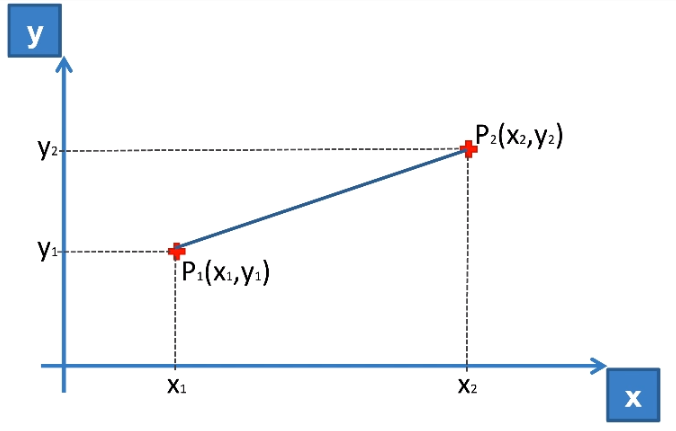


There are two ways to re-scale a variable, either by Standarisation or Normalisation
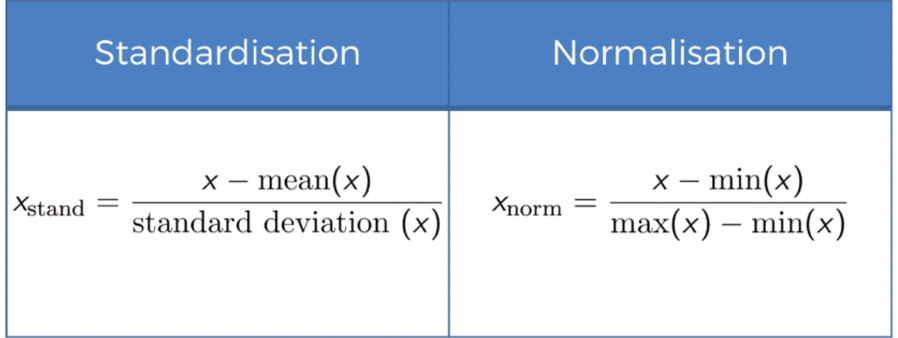

- Use MinMaxScaler as your default
- Use RobustScaler if you have outliers and can handle a larger range
- Use StandardScaler if you need normalized features
- Use Normalizer sparingly - it normalizes rows, not columns

In [ ]:
from sklearn.preprocessing import StandardScaler   # Feature Scaling

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)
# Note that MinMaxScaler doesn’t reduce the importance of outliers. We will go in the first try with Minmax


sc_scaler = StandardScaler()
X_train = sc_scaler.fit_transform(X_train)
X_test = sc_scaler.transform(X_test)

# Train set will need to be fit and transformed, while test set will only need to be transformed (already fitted)
# Careful! If you scale the categorical code information you will stop knowing which is which. 
# We don't need to apply feature scaling to Y because in this case is classification. If it's regression we might need to do it. 
print(X_train)

### Feature selection and extraction

Feature selection is basically choosing through the p-values which of our features explain our model the least and remove them. We have an example in multivariate lineal regression.

#### Select K Best

In [ ]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_best = SelectKBest(score_func=chi2,k=5).fit_transform(X,y)
print(X_best) # and compare to know which variables are the best

#### PCA - Principal component Analysis

Unsupervised learning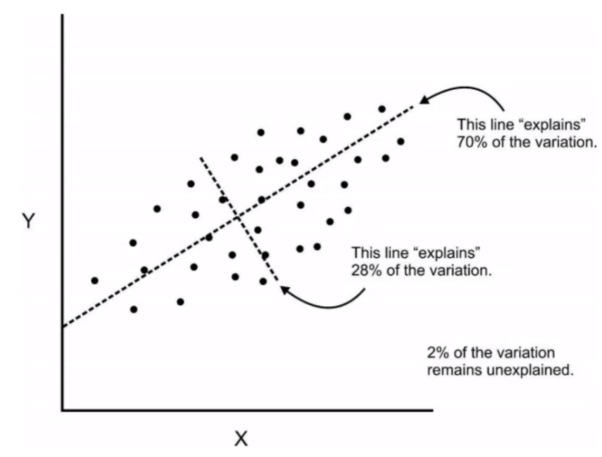

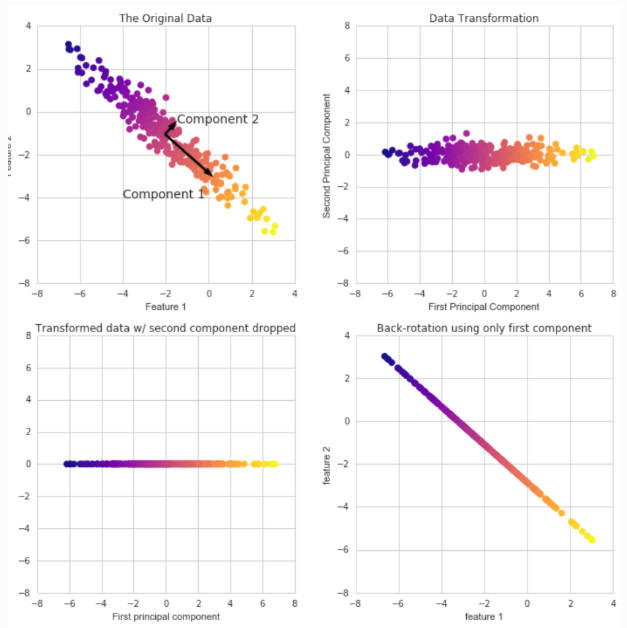

1. original data and component identification, finding the relationship between X and Y values and the list of principal axes
(eigenvalues is "valor propio")
2. rotation so the principal component is the x axis
3. Dropped the second component
4. Return to original

In [ ]:
# After split & scaling

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# We have to fit and transform x_train and then transform x_test because there's no Y (labels)


# Variance vector
pca = PCA(n_components=None)
#fit & transform
explained_variance = pca.explained_variance_ratio_

#### LDA (Linear Discriminant Analysis, higher separation)

In addition to find main axises, LDA tries to maximize the separation between multiple classes. LDA is supervised as maintains a relationship with the label. 
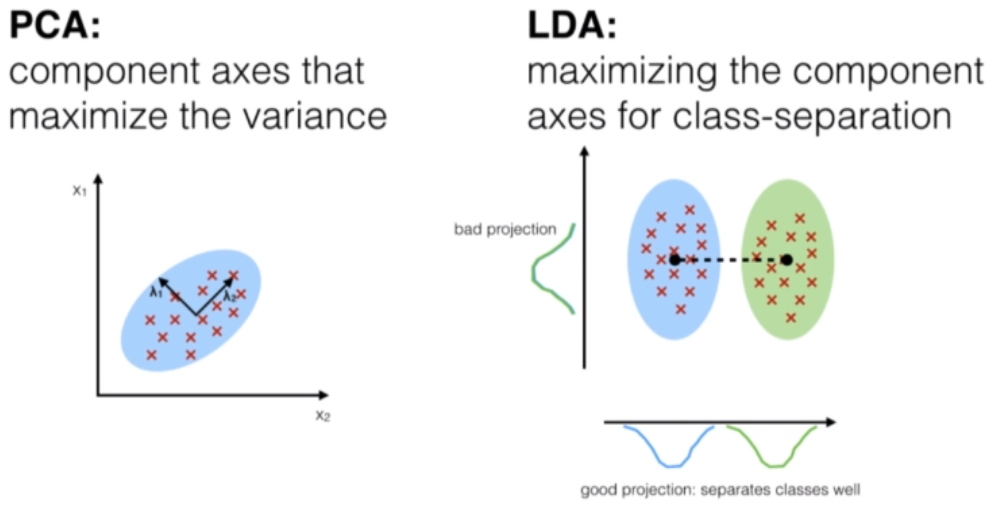

In [ ]:
# Also after splitting and scaling. 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train,y_train) # supervised!
x_test = lda.transform(x_test)

#### Kernel PCA (non linear problems)

In [ ]:
from sklearn.decomposition import KernelPCA as KPCA
kpca = KPCA(n_components=2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

#### Other notes (fix)

In [ ]:
# Eigenfaces: PCA with pictures of people. 

In [7]:
# Non-composite dimensionality reduction
# SelectKbest
# Selectpercentile 

Univariate feature selection
There are several go-to methods of automatically selecting your features in sklearn. Many of them fall under the umbrella of univariate feature selection, which treats each feature independently and asks how much power it gives you in classifying or regressing.
There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).
A clear candidate for feature reduction is text learning, since the data has such high dimension. We actually did feature selection in the Sara/Chris email classification problem during the first few mini-projects; you can see it in the code in tools/email_preprocess.py .


## Model Validation

Separate the data in train and test to be able to make predictions. 

### Simple Validation: Train/Test Split

In [ ]:
# Test_size is the percentage of dataset we set apart to be checked vs the predictions. Usually .1/0.2
# random state creates a reference and allows us to recreate the random experiment again 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# to stratify just add (stratify=y) in the parameters

### K fold scores cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())


### Cross Validation: many splits 

#### Leave one out

n-1 for train, 1 for test

- Low bias because we use all data points
- High variation because we test against 1 data point and our estimation gets highly influenced by that data point. 
- High execution time

In [7]:
from sklearn.model_selection import LeaveOneOut
X = 
y =
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

#### K-fold

In [ ]:
# XGBOOST version

from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42) 

for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    # params configuration also from the1owl's kernel
    # https://www.kaggle.com/the1owl/forza-baseline    
    xgb_params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 
                  'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 99, 'silent': True}

    d_train = xgb.DMatrix(X_train, y_train)
    d_test = xgb.DMatrix(X_test, y_test)
    d_3 = xgb.DMatrix(test)
    
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    model = xgb.train(xgb_params, d_train, 5000,  watchlist, feval=gini_xgb, maximize=True, verbose_eval=50, early_stopping_rounds=100)
                        
    xgb_pred = model.predict(d_3)
    xgb_preds.append(list(xgb_pred))
    
preds=[]
for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(K):
        sum+=xgb_preds[j][i]
    preds.append(sum / K)

output = pd.DataFrame({'id': id_test, 'target': preds})
output.to_csv("{}-foldCV_avg_sub.csv".format(K), index=False)   
    

In [ ]:
# RorC
from sklearn.model_selection import StratifiedKFold

random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

#### Stratified Shuffle Split

Necessary for cases where classes or variables are ordered (1 before 2 before 3). Makes sure Kfold doesn't grab one after the other. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X[train_index], X[val_index] 
    y_train, y_test = y[train_index], y[val_index]

#### Rolling origin / time series cross validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
for train_index, test_index in tscv.split(X):
     print("Train:", train_index, "Validation:", val_index)
     X_train, X_test = X[train_index], X[val_index]
     y_train, y_test = y[train_index], y[val_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]



###  Bias-variance trade-off

If the algorithm is too complex or flexible (e.g. it has too many input features or it’s not properly regularized), it can end up “memorizing the noise” instead of finding the signal. 

Of core importance is the following question: if our estimator is underperforming, how should we move forward? There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each samplem

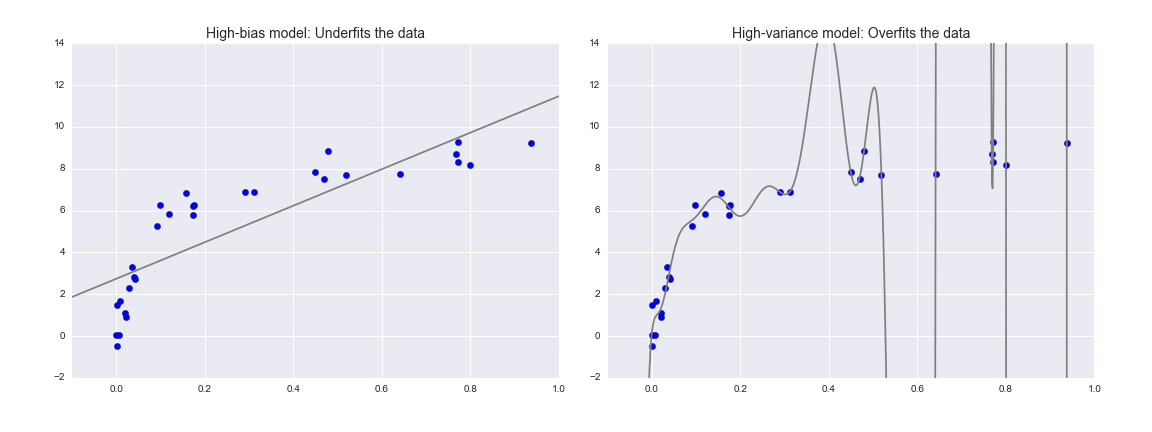
- __High bias/low variance:__ underfits the model by not having enough flexibility. 
Performance on test set is similar to training set
- __High variance/low bias:__ overfits the model by having too much flexibility
Performance on training set higher than on test set

## Gridsearch

We will explore a three-dimensional grid of model features; namely the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem. This can be set up using Scikit-Learn's GridSearchCV meta-estimator:

###  SVM

In [ ]:
# Gridsearch for SVM
from sklearn.grid_search import GridSearchCV

# To find if we have a problem linear or not, use gridCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}]
grid = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                   verbose = 3, refit = True)
grid_search = grid.fit(X_train, y_train)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_

grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

###  Linear regression

In [ ]:
# Gridsearch for linear regression
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}


grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)


grid.fit(X, y);
grid.best_params_
clf = grid.best_estimator_


###  KNN

In [ ]:
# grid search cross validation with 1 hyperparameter
# KNN classifier
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

###  Logistic regression

In [10]:
# grid search cross validation with 2 hyperparameter
# Logistic regression 
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2

param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

## Feature Pipeline + Gridsearch

We can use pipeline to execute various functions at the same time. For example, we might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression


To streamline this type of processing pipeline, Scikit-Learn provides a Pipeline object, which can be used as follows:

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

print(sorted(pipe.get_params().keys()))  
# prints a sorted list of available params


In [ ]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

However, the best use of pipeline is to use it alongside Gridsearch to find the best possible parameters 

In [ ]:
# Ejemplo: Adaboost tuneup

from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Adaboost tuneup
scaler = MinMaxScaler()
clf = AdaBoostClassifier()
pca = PCA()

pipe = make_pipeline(scaler, pca, clf)

print sorted(pipe.get_params().keys())
"""['adaboostclassifier', 'adaboostclassifier__algorithm', 
'adaboostclassifier__base_estimator', 'adaboostclassifier__learning_rate',
'adaboostclassifier__n_estimators', 'adaboostclassifier__random_state', 
'memory', 'minmaxscaler', 'minmaxscaler__copy', 
'minmaxscaler__feature_range', 'pca', 'pca__copy', 
'pca__iterated_power', 'pca__n_components', 'pca__random_state', 
'pca__svd_solver', 'pca__tol', 'pca__whiten', 'steps']
"""


# we pass params as a dict
params = {'pca__n_components': np.arange(1,len(data.columns)),
          'adaboostclassifier__n_estimators': [1, 5, 10, 25, 50]}

my_clf = GridSearchCV(pipe, param_grid=params, scoring='f1',verbose=1)
my_clf.fit(X_train, y_train)

pred = my_clf.predict(X_test)

print("Best estimator found by grid search:")
print( my_clf.best_estimator_)
print('Best Params found by grid search:')
print( my_clf.best_params_)

# Classification algorithms

## Logistic regression (binary, probability as score)

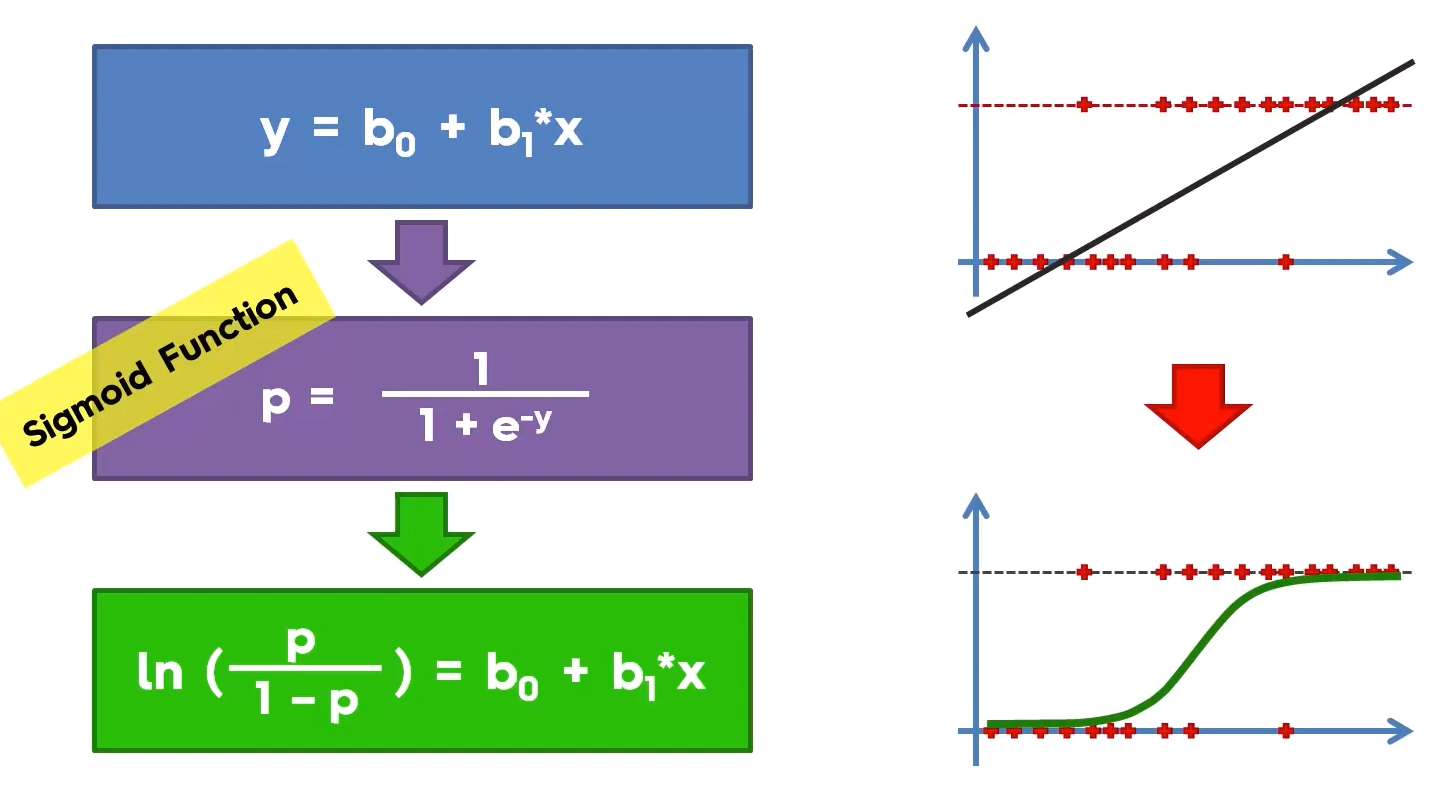

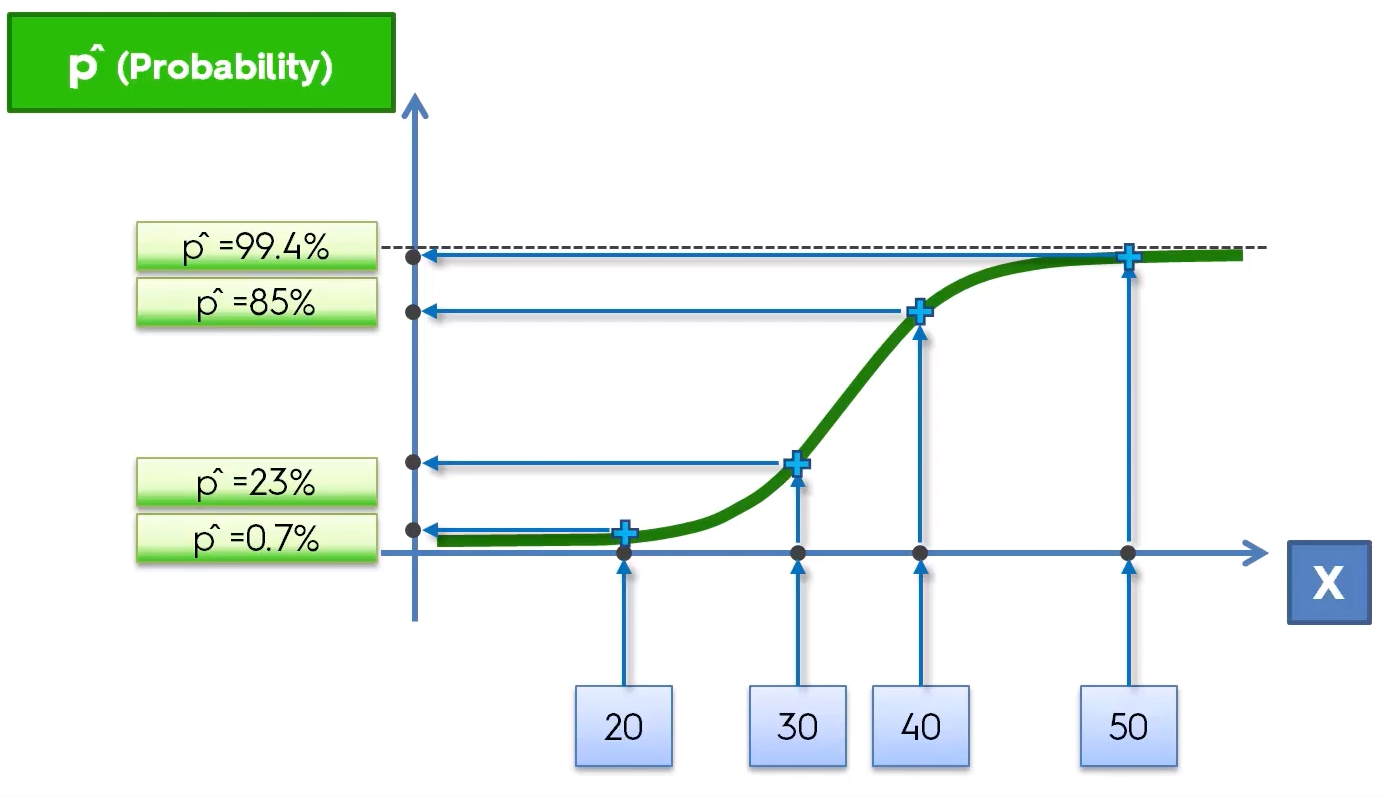
Probability as a score

- logistic regression output is probabilities
- If probability is higher than 0.5 data is labeled 1(abnormal) else 0(normal)
- By default logistic regression threshold is 0.5
- ROC is receiver operationg characteristic. In this curve x axis is false positive rate and y axis is true positive rate
- If the curve in plot is closer to left-top corner, test is more accurate.

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0, avoid having binary column in our x

data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

""" 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
"""

# Entender siguientes dos líneas
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Naive Bayes

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$
 
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB


from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


clf = GaussianNB()                    # classifier (Gauss NB)
clf.fit(Xtrain, ytrain)                   # fit/train classifier
GaussianNB(priors=None)
pred = clf.predict(Xtest)

from sklearn.metrics import accuracy_score
print accuracy_score(ytest, pred)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## SVM

Algorith that seeks to find the biggest separation between all positive and negative examples (margin). In the case of finding outliers, SVM ignores tries to ignore the outliers. 

If the data is perfectly separated is pretty easy to implement. However, if it has other shapes we will have to change the kernel options of the classifier. What it does, basically, is remap the data into a higher dimensional space so it becomes separable. For this we use the RBF Kernel and control the shape and adaptability with the Gamma variable.

It's useful when clear separation, but not with large datasets with lots of noise, as it tends to overfit. 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

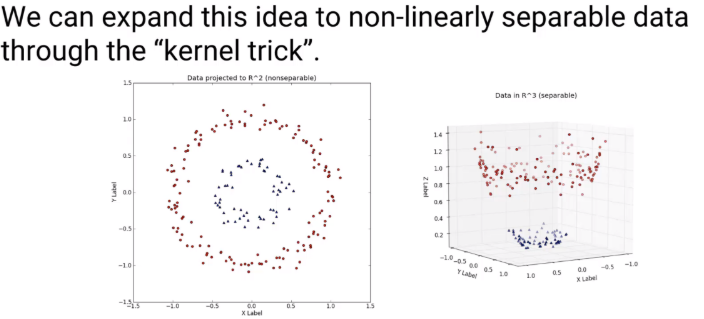

For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer, and can grow to encompass some points.
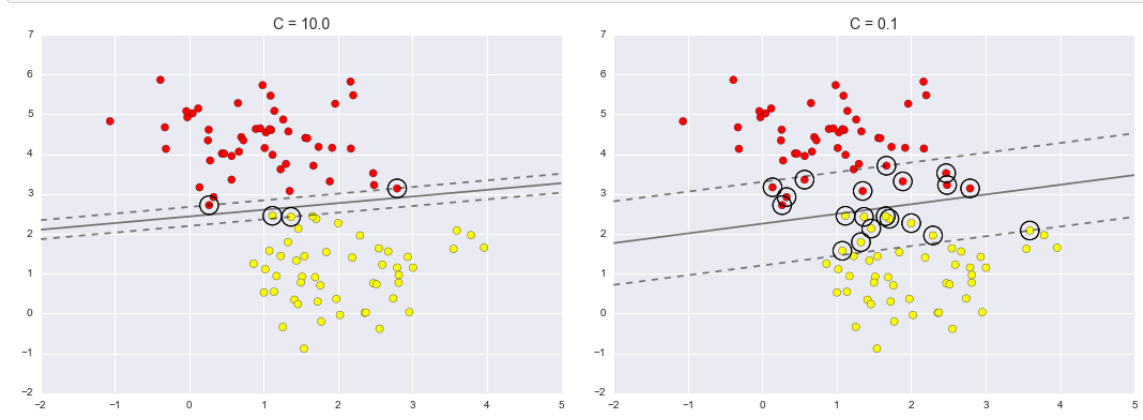

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
"""
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
  
1. Kernel options:  It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.

2. Gamma: 
        Small gamma --> pointed corners, low bias, high variance 
        Large gamma --> softer corners, higher bias, lower variance

3. C: Tradeoff betweeen smooth decision boundary or classifying points correctly. High risk of overfitting       
  """
predictions = model.predict(X_test)

## KNN (K nearest Neighbours), clustering labels by closeness

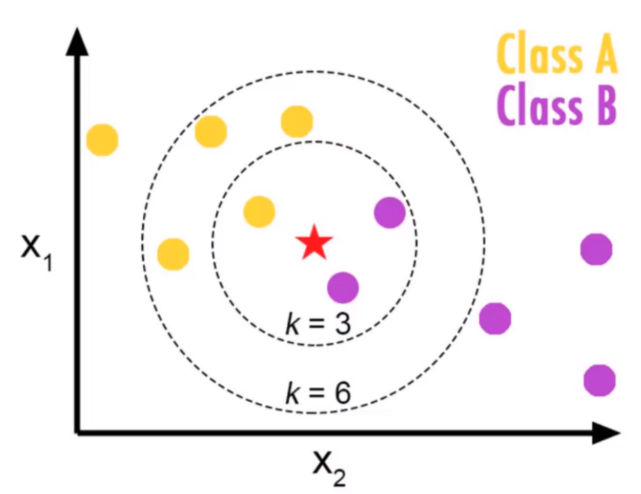

In [ ]:
    from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

""" 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           
           Low k will result in a lot of noise and bias
           Distance metric: distance between new point and all
           
           Cons: not good for large datasets or with lots of features, and categorical features don't fit too well either
           
"""
pred = knn.predict(X_test)


In [ ]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

### Cross Validation to calculate better K values. 


In [ ]:
from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,50) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Elbow Method to calculate better K values. Will take some time


In [ ]:
# Elbow Method to calculate better K values. Will take some time
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Regression tree classifiers


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Regression algorithms

## Linear regressions


### Regularization

As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

- Ridge regression: First regularization technique. Also it is called L2 regularization.
    - Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
    - alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
    - What if alpha is zero? lost function = OLS so that is linear rigression :)
    - If alpha is small that can cause overfitting
    - If alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.

- Lasso regression: Second regularization technique. Also it is called L1 regularization.
    - Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
    - It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
    - In order to choose feature, I add new features in our regression data

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

### Algorithm 


y = x*a+b
    a = slope
    b = intercept
    
Ordinary Least Squares vs Gradient Descent

R square answers the question: “how much of my change in output (y) is due to the change in input (x)? between 0 and 1 the higher the better.
We fit regression with training data, so overfitting will show up in having a lower r score on testing data. 

Evaluation metric: R2

We assume that has the following:
1. linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of errors
5. Lack of multicollinearity


In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression(fit_intercept=True)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

# one specific value
clf.pred()

print('R^2 score: ',reg.score(x, y))

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Model evaluation (beta coefficients)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df



In [ ]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
#comparing predictions with actual real data 

### Multiple linear regression

Same as working with simple linear regressions, but we are going to use backward elimination and p-values to select the best possible variables. 

#### Backward elimination


1. Select minimum significance level (SL)
2. Fit full model with all prossible predictors
3. Consider the predictor with highest P-value. If P > SL, remove said predictor.
4. Run & fit the full model minus removed predictor
5. Finish once all predictors are <= SL 

In [ ]:
# Adding columns of 1's for the constant in the regression
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
# Create a matrix of 50x1 ones as int and append X matrix. 
# Be careful with the double parenthesis in np.ones

In [ ]:
import statsmodels.formula.api as sm 
X_optimal = X[:,[0,1,2,3,4,5]]
clf_ols = sm.OLS(endog=Y, exog=X_optimal).fit()
""" We create an optimal matrix with all the variables in which we will be deleting variables. 
Using Ordinary Least Squares, we fit a regressor with endog as dependant and exog as independent
"""

In [ ]:
regressor_ols.summary();
""" R squared, adjusted, P-values
The lower the P-value, the more significant for the model
We want to remove the biggest one, in this case, column 2
"""
X_optimal = X[:,[0,1,3,4,5]]
regressor_ols = sm.OLS(endog=Y, exog=X_optimal).fit()
regressor_ols.summary();


#### Automatic backward elimination 

In [ ]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL

### Polynomial regressions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
"""
We should apply polynomial either to both test and train
or do it before splitting.
poly_reg creates a new matrix with the original features 
+ column of 1's 
+ new columns for each of the degrees. 
"""
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

##  Decision trees + random forest classifier

### Regression trees

For non-linear, non-continuous decision making. Works with the averages of the levels. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Prone to extreme overfitting. 
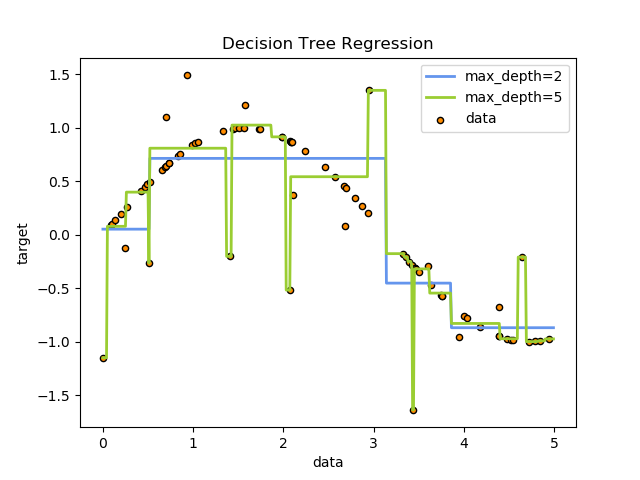

1. min_samples_split: helpts determine how many samples does a branch need to split further down. 
2. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
3. Criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Measures the impurity in a bunch of examples and controls how a decision tree decides where to split the data. If all examples are in the same class, the entropy would be 0 (all examples are equal). However, if the examples are evenly split between the classes, entropy would be 1. 

Gini is intended for continuous attributes and Entropy is for attributes that occur in classes

        Gini is to minimize misclassification
        Entropy is for exploratory analysis

In [ ]:
# Information gain and splits: do the new splits increase the information gain? -> leaves = splits

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

model = tree.DecisionTreeClassifier(criterion='gini') 
# for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression

### random forest classifier (splits chosen randomly over n random estimators)

1. Pick at random  K data points from Training set
2. Build the Decision Tree associated to these K data points
3. Choose the number of N trees of trees you want to build and repeat 1 & 2
4. For a new data point, make each one of your Ntrees to predict the value of Y for the data point in question, and assign the new data point the average accross all predicted Y values.

You end up with an average of N predictions. 

In [ ]:
# For regression problems: random forest regressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rfc = RandomForestClassifier(n_estimators=100, random_state=4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
""" RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
            splits chosen randomly
"""
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

# Emsemble algorithms

## Adaboost

https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/

##  Gradient Boosting

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

## Xtreme Gradient Boost (Base + Bruteforce CVPipline)

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Explanations

1. Regularization:

Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
In fact, XGBoost is also known as ‘regularized boosting‘ technique.

2. Parallel Processing:

XGBoost implements parallel processing and is blazingly faster as compared to GBM.
But hang on, we know that boosting is sequential process so how can it be parallelized? We know that each tree can be built only after the previous one, so what stops us from making a tree using all cores? I hope you get where I’m coming from. Check this link out to explore further.
XGBoost also supports implementation on Hadoop.


3. High Flexibility

XGBoost allow users to define custom optimization objectives and evaluation criteria.
This adds a whole new dimension to the model and there is no limit to what we can do.


4. Handling Missing Values

XGBoost has an in-built routine to handle missing values.
User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.


5. Tree Pruning:

A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.

XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

6. Built-in Cross-Validation

XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
This is unlike GBM where we have to run a grid-search and only a limited values can be tested.

7. Continue on Existing Model

User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
GBM implementation of sklearn also has this feature so they are even on this point.

### Parameter tuning

### Code

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10)
accuracies.mean()
accuracies.std()


In [ ]:
# GridSearchCV Brute-force
pipeline_XGB = Pipeline([('imputer', Imputer(axis=0)), ('xgbrg', XGBRegressor())])

param_grid = {
    "xgbrg__n_estimators": [100, 200, 300, 500, 1000, 2000],
    "xgbrg__learning_rate": [0.01, 0.05, 0.075, 0.1],
    "xgbrg__subsample": [0.6, 0.7, 0.8, 0.9, 1]
}

fit_params = {"xgbrg__eval_set": [(np.array(X_val_one_hot_encoded),  y_val)], 
              "xgbrg__early_stopping_rounds": 1000, 
              "xgbrg__verbose": False} 

searchCV = GridSearchCV(pipeline_XGB, cv=KFold(n_splits=3), scoring = 'neg_mean_absolute_error', n_jobs=4,
                        param_grid=param_grid, fit_params=fit_params)
searchCV.fit(np.array(X_train_one_hot_encoded), y_train)
print(searchCV.best_params_)

In [ ]:
# Use the best parameters from Grid Search, and calculate MAE
pipeline_XGB_BF = make_pipeline(
    Imputer(), 
    XGBRegressor(n_estimators=searchCV.best_params_["xgbrg__n_estimators"], 
                 learning_rate=searchCV.best_params_["xgbrg__learning_rate"],
                 subsample=searchCV.best_params_["xgbrg__subsample"],                           
                 n_jobs=4,
                 verbose=0))

pipeline_XGB_BF.fit(X_train_one_hot_encoded, y_train)

scores = cross_val_score(pipeline_XGB_BF, X_one_hot_encoded, y, cv=searchCV.cv, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

In [ ]:
# Benchmark model
pipeline_XGB_benchmark = make_pipeline(
    Imputer(), 
    XGBRegressor(n_estimators=1000, 
                 learning_rate=0.05,
#                  early_stopping_rounds = 2,
                 subsample = 1,
                 eval_set= [(X_val_one_hot_encoded,  y_val)],
                 verbose= 0))
pipeline_XGB_benchmark.fit(X_train_one_hot_encoded, y_train)

scores = cross_val_score(pipeline_XGB_benchmark, X_one_hot_encoded, y, cv=searchCV.cv, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# Clustering (unsupervised) algorithms

##  K means clustering (clustering without labels, unsupervised)

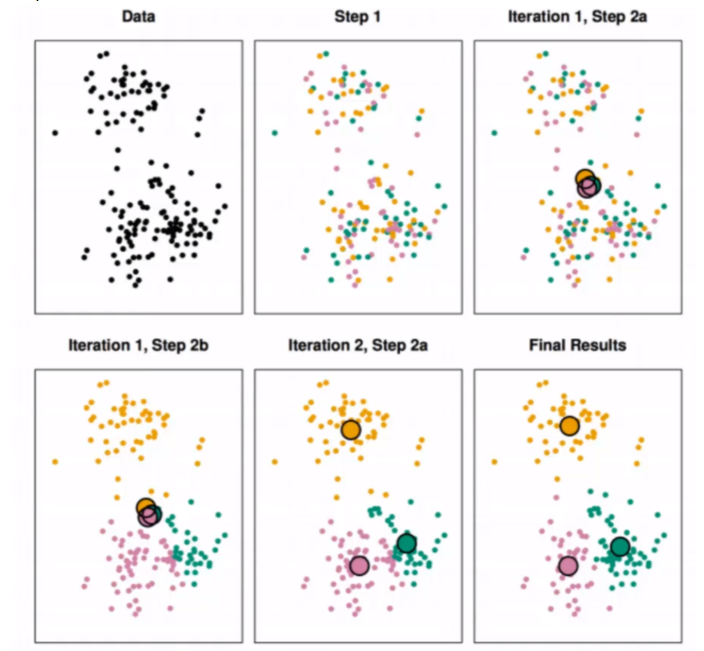

Number of clusters "k"
Randomly assign each point to a cluster. 
Until clusters stop changing, repeat:
- for each cluster, compute the centroid by taking the mean vector of points
- assign each data point to the closests centroid cluster

Number of clusters "k"
Randomly assign each point to a cluster. 
Until clusters stop changing, repeat:
- for each cluster, compute the centroid by taking the mean vector of points
- assign each data point to the closests centroid cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

kmeans.cluster_centers_

kmeans.labels_


#visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

For chosing optimal K we will use the elbow method through computing the SSE (sum of squared errors, suma cuadratica de errores), for some values of k (ie 2,3,6,8)

If you plot k against the SSE, you will see that error decresases as k gets larger (since the number of clusters k increases, distance should be smaller). The idea of the elbow method is to choose a k at which SSE decreases abruptly

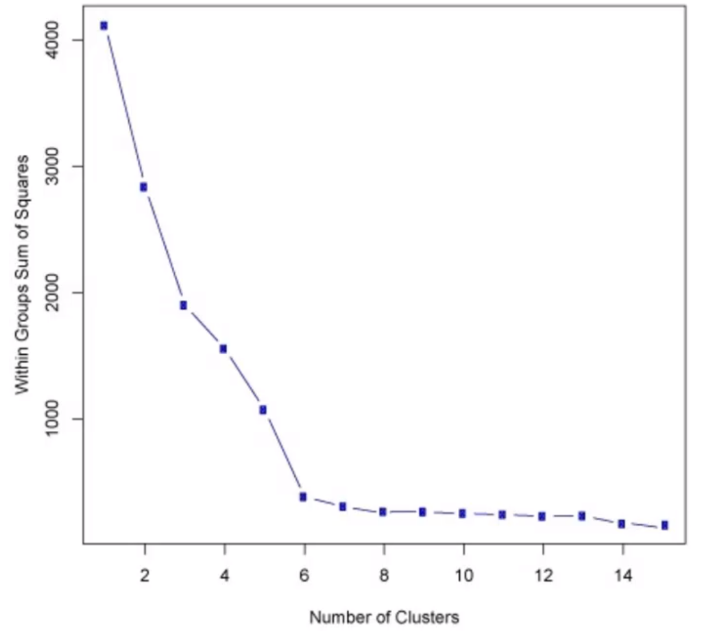

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)

# Notice how we don't have y, everything comes from X

plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [ ]:
# inertia: can be recognized as a measure of how internally coherent clusters are.
# we are looking for low inertia and low number of clusters

inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

## PCA (Above)

# Evaluation Metrics

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

## Regression Evaluation metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

###  R Squared

In [ ]:
clf_ols.summary()

The score here is the $R^2$ score, or coefficient of determination, which measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.

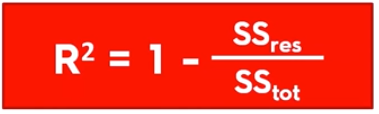
Adding new variables will only increase or maintain the R2 score because we are adding more information. 

### Adjusted R squared

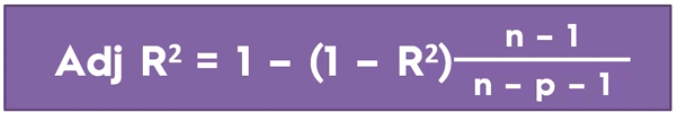

where:
p is the number of regressors (independent variables)
n is sample size

It penalizes the addition of new regressors that don't add info. 

## Classification Accuracy

 Accuracy= Number of correct predictions / Total number of predictions 

Is good, but not ideal in skewed cases (lots of data belong to one class) or when the stakes are high (in cancer treatment, it's better to treat a person without cancer than not treating a sick person)

In [ ]:
from sklearn.metrics import accuracy_score
print accuracy_score(ytest, pred)

### Confusion matrix

Really similar to error type 1 and type 2 in statistics. 

Compares the prediction vs the actual label in a matrix form, creating four different categories:
1. True positives: The cases in which we predicted YES and the actual output was also YES.
2. True negatives: The cases in which we predicted NO and the actual output was NO.
3. False positives: The cases in which we predicted YES and the actual output was NO.
4. False negatives: The cases in which we predicted NO and the actual output was YES.

It works not only with binary classification but with many classes as well. 

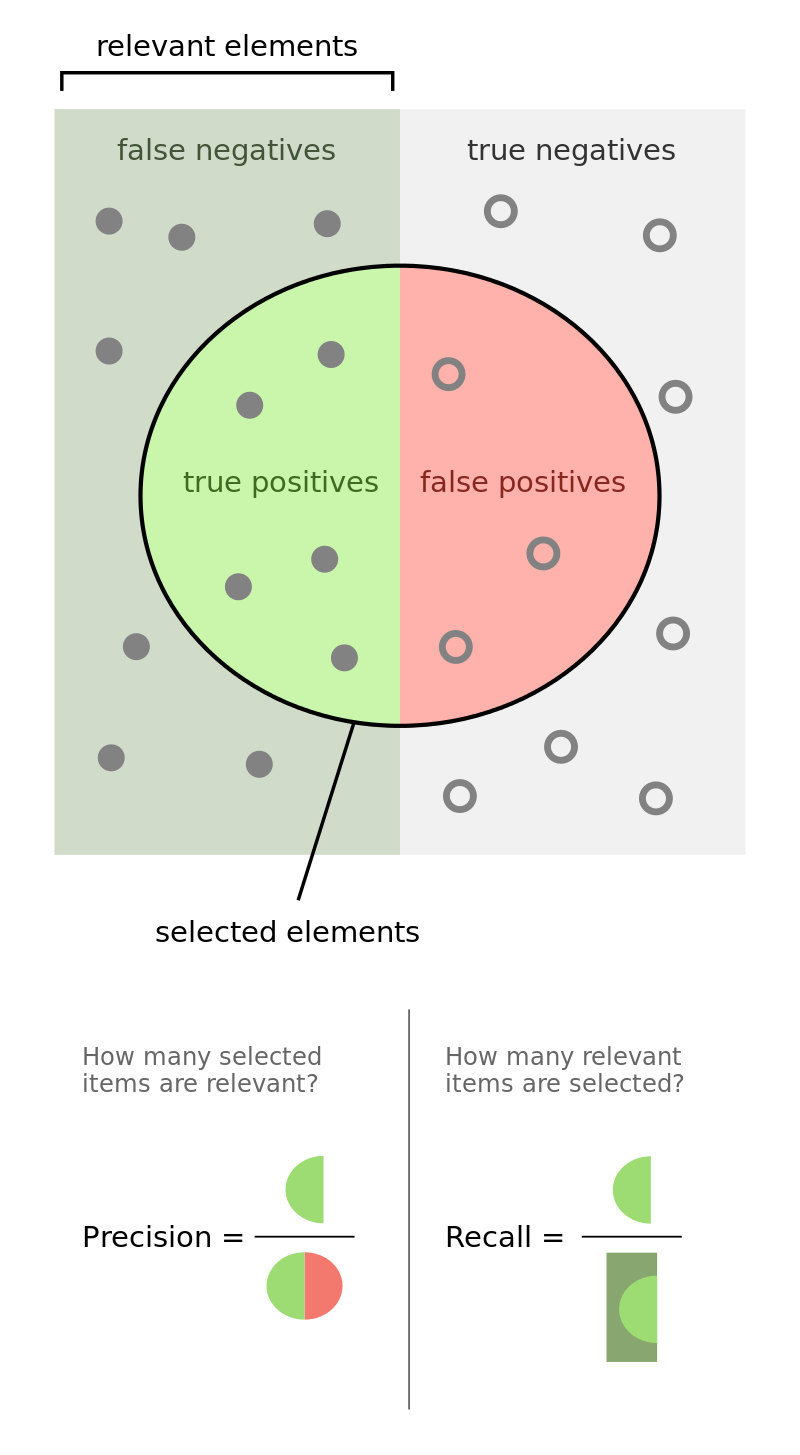

This creates two different metrics
1. Recall/Sensitivity: True positive / (True positive + False negative)
What proportion of positive identifications was actually correct?

2. Precission/Specificity: True positive / (True positive + False positive)
What proportion of actual positives was identified correctly?


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test,pred))

###  Validation curves, learning curves
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb

# Text learning< 

Bag of words
We count the frequency in which the words are going to appear and put in a dictionary.
Advance techniques of text learning takes out the steem of the word, so it reads the verb without conjugation.

So far, the word order doesn’t matter, we can’t handle complex phrases (“Chicago Bulls”), so we have enormous limitations to our tools. 

Stopwords like a, of and such

In [ ]:
# Sklearn (bag of words = count vectorizer)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
string1 = "hi Katie the self driving car will be late Best Sebastian"
string2 = "Hi Sebastian the machine learning class will be great great great Best Katie"
string3 = "Hi Katie the machine learning class will be most excellent"

vec = [string1, string2, string3]

bag_of_words = vectorizer.fit_transform(vec) 
print vectorizer.vocabulary_.get(“great”)


There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

We need to both fit (assigning numerical order to words) and transform (takes the words and counts).
0 indexed: 0 string will be email 1, and so on. 

Note that not all words are equal
Some contain more information than others, so we will remove them. These words are called stopwords, and depending on our context might happen very frequently, reducing the information we gain from taking them into account. 

Extracting stopwords from NLTK 
from nltk.corpus import stopwords
sw = stopwords.words(“english”)

Stemmer algorithm with NLTK
tfrom nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(“english”)
stemmer.stem(“responsiveness”)

It finds the stem “respons”


Order of operations in text processing
First we have to do the stemming and then the bag of words. Example below: 
Suppose that the text in question is "responsibility is responsive to responsible people"
If you put into bag of words straightaway, you get something like
[is:1 
people: 1
responsibility: 1
responsive: 1
responsible:1]
and then applying stemming gives you 
[is:1
people:1
respon:1
respon:1
respon:1]
Then you would need another post-processing step to get to the following bag of words, which is what you'd get straightaway if you stemmed first:
[is:1 
people:1
respon:3]

Weighting by Term Frequency
Tf Idf Representation - weights more the rare words than common words. 
Tf - term frequency -> similar to bag of words
Idf - inverse document frequency -> weighting by how often word occurs in corupus.

In [ ]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)